In [2]:
import numpy as np, pandas as pd, matplotlib as mpl, os
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r"C:\Users\HP\Documents\Machine learning\cats_and_dogs_small\train"
validation_dir = r"C:\Users\HP\Documents\Machine learning\cats_and_dogs_small\validation"
test_dir = r"C:\Users\HP\Documents\Machine learning\cats_and_dogs_small\test"

### Data preprocessing
- read the picture files
- decode the jpeg content to rgb grids of pixels
- convert these into floating point tensors
- rescale the pixel values (between 0 to 255) to the (0, 1) interval

the keras image generator module can do all thes steps in one function

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# create an object with the data generator and rescaling the pixel vlaues between 0 and 1

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, # training directory
                                                   target_size=(150,150), #this is to resixe the images
                                                   batch_size=20, # images are being fitted in the batches of 20
                                                   class_mode='binary') # classification problem with 2 classes
#the output of the train_generator would be in the form of x and y label
# the y labels will be named according to the folder (in the case: cats and dogs)

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')   
                                            

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers, models

In [9]:
model = models.Sequential()

# 4 convolutional layers with pooling
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# flatten 

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 256)      

In [11]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer= optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
history = model.fit_generator(train_generator, # fit generator cos we are getting our data in the batches of 20
                             steps_per_epoch=100, # train generator generates data continously so we need a stop point at 100 after it has generated 20 images 100 times which will equal the 2000 trainng images
                             epochs=20,
                             validation_data=validation_generator,
                             validation_steps=50) # 1000 validation data divided by 20 equeals 50 steps

Epoch 1/20
100/100 [==============================] - 77s 769ms/step - loss: 0.6885 - acc: 0.5330 - val_loss: 0.6726 - val_acc: 0.5270
Epoch 2/20
100/100 [==============================] - 64s 639ms/step - loss: 0.6418 - acc: 0.6205 - val_loss: 0.6174 - val_acc: 0.6580
Epoch 3/20
100/100 [==============================] - 72s 716ms/step - loss: 0.5769 - acc: 0.6875 - val_loss: 0.6012 - val_acc: 0.6850
Epoch 4/20
100/100 [==============================] - 89s 892ms/step - loss: 0.5486 - acc: 0.7175 - val_loss: 0.5948 - val_acc: 0.6780
Epoch 5/20
100/100 [==============================] - 66s 662ms/step - loss: 0.5160 - acc: 0.7465 - val_loss: 0.5736 - val_acc: 0.7000
Epoch 6/20
100/100 [==============================] - 62s 619ms/step - loss: 0.4854 - acc: 0.7690 - val_loss: 0.5689 - val_acc: 0.7010
Epoch 7/20
100/100 [==============================] - 65s 652ms/step - loss: 0.4519 - acc: 0.7920 - val_loss: 0.5597 - val_acc: 0.7110
Epoch 8/20
100/100 [==============================] - 6

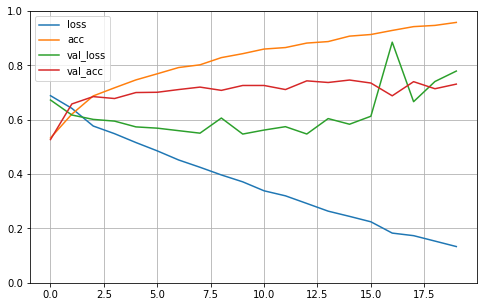

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
model.save('model.h5')

In [16]:
%pwd

'C:\\Users\\HP\\Documents\\Machine learning\\note books'

We can detect some overfitting in the data because the training accuracy is increasing but the vlaidation accuracy remains the same 


In [18]:
from tensorflow.keras import backend

backend.clear_session()
del model

### Data augumentation 

its a technique to improve accuracy by tweaking the original image eg scaling, shering, zooming, rotating etc
this is applied to the same trainig data

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
# model architerture

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # for each epoc we are deactivation 50% of the entire neurons

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [21]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 124s 1s/step - loss: 0.6942 - acc: 0.5271 - val_loss: 0.6903 - val_acc: 0.5152
Epoch 2/100
100/100 [==============================] - 91s 907ms/step - loss: 0.6822 - acc: 0.5609 - val_loss: 0.6574 - val_acc: 0.6022
Epoch 3/100
100/100 [==============================] - 91s 914ms/step - loss: 0.6733 - acc: 0.5713 - val_loss: 0.6418 - val_acc: 0.6263
Epoch 4/100
100/100 [==============================] - 90s 902ms/step - loss: 0.6553 - acc: 0.5968 - val_loss: 0.6223 - val_acc: 0.6497
Epoch 5/100
100/100 [==============================] - 91s 909ms/step - loss: 0.6369 - acc: 0.6363 - val_loss: 0.6068 - val_acc: 0.6631
Epoch 6/100
100/100 [==============================] - 95s 950ms/step - loss: 0.6208 - acc: 0.6558 - val_loss: 0.5789 - val_acc: 0.6872
Epoch 7/100
100/100 [==============================] - 94s 937ms/step - loss: 0.6086 - acc: 0.6566 - val_loss: 0.6084 - val_acc: 0.6440
Epoch 8/100
100/100 [=============================

100/100 [==============================] - 106s 1s/step - loss: 0.4194 - acc: 0.8050 - val_loss: 0.4414 - val_acc: 0.7830
Epoch 62/100
100/100 [==============================] - 103s 1s/step - loss: 0.4033 - acc: 0.8112 - val_loss: 0.4925 - val_acc: 0.7760
Epoch 63/100
100/100 [==============================] - 122s 1s/step - loss: 0.4208 - acc: 0.8034 - val_loss: 0.5234 - val_acc: 0.7557
Epoch 64/100
100/100 [==============================] - 123s 1s/step - loss: 0.4064 - acc: 0.8147 - val_loss: 0.4264 - val_acc: 0.8058
Epoch 65/100
100/100 [==============================] - 105s 1s/step - loss: 0.3995 - acc: 0.8144 - val_loss: 0.4681 - val_acc: 0.7906
Epoch 66/100
100/100 [==============================] - 103s 1s/step - loss: 0.4082 - acc: 0.8138 - val_loss: 0.4178 - val_acc: 0.8128
Epoch 67/100
100/100 [==============================] - 102s 1s/step - loss: 0.4034 - acc: 0.8172 - val_loss: 0.4107 - val_acc: 0.8115
Epoch 68/100
100/100 [==============================] - 131s 1s/step

In [22]:
model.save('project_cnn.h5')

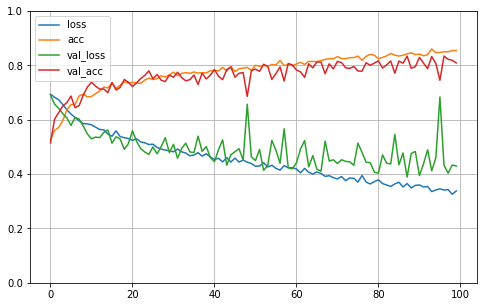

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# testing the model
test_datagen = test_datagen.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size=20,
                                               class_mode='binary')

In [33]:
model.evaluate_generator(test_datagen, steps=50)

[0.42469225615262984, 0.82296956]